In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reads the CSV using pandas dataframe
noc_data = pd.read_csv('noc2_regions.csv')
athletes = pd.read_csv('athletes_data.csv')
athletes.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
# Size of the dataframe
print(athletes.size)

4066740


In [5]:
# Dimensions of the dataframe
print(athletes.shape)

(271116, 15)


In [6]:
#Pre-processing data to filter only Summer Olympics Stats
athletes = athletes[athletes['Season']=='Summer']
athletes.shape

(222552, 15)

In [7]:
#Reads NOC_Regions 
noc_data

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Netherlands Antilles,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,South Yemen,South Yemen
227,YUG,Yugoslavia,Yugoslavia
228,ZAM,Zambia,NaN


In [8]:
#My goal is to map all the NOCs with the original Country names so using a Mapping Dictionary
noc_region_map = dict(zip(noc_data['region'], noc_data['NOC']))
print(noc_region_map)

{'Afghanistan': 'AFG', 'Netherlands Antilles': 'AHO', 'Albania': 'ALB', 'Algeria': 'ALG', 'Andorra': 'AND', 'Angola': 'ANG', 'Antigua and Barbuda': 'ANT', 'Australasia': 'ANZ', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Aruba': 'ARU', 'American Samoa': 'ASA', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Bahamas': 'BAH', 'Bangladesh': 'BAN', 'Barbados': 'BAR', 'Burundi': 'BDI', 'Belgium': 'BEL', 'Benin': 'BEN', 'Bermuda': 'BER', 'Bhutan': 'BHU', 'Bosnia and Herzegovina': 'BIH', 'Belize': 'BIZ', 'Belarus': 'BLR', 'Bohemia': 'BOH', 'Boliva': 'BOL', 'Botswana': 'BOT', 'Brazil': 'BRA', 'Bahrain': 'BRN', 'Brunei': 'BRU', 'Bulgaria': 'BUL', 'Burkina Faso': 'BUR', 'Central African Republic': 'CAF', 'Cambodia': 'CAM', 'Canada': 'CAN', 'Cayman Islands': 'CAY', 'Republic of Congo': 'CGO', 'Chad': 'CHA', 'Chile': 'CHI', 'China': 'CHN', 'Ivory Coast': 'CIV', 'Cameroon': 'CMR', 'Democratic Republic of the Congo': 'COD', 'Cook Islands': 'COK', 'Colombia': 'COL', 'Comoros': 'COM', 'Cape Ver

In [9]:
#Merging NOC_DATA with our original data
athletes = pd.read_csv('athletes_data.csv')
athletes = athletes[athletes['Season']=='Summer']
athletes = athletes.merge(noc_data,on='NOC',how='left')
athletes.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN


In [10]:
#Countries participated in Olympics till date
athletes['region'].unique().shape

(226,)

In [11]:
#Checks and removes duplicated rows
athletes.duplicated().sum()
athletes.drop_duplicates(inplace=True)

In [12]:
#Calculates the count of gold,silver and bronze medals
gold = 0
silver = 0
bronze = 0
for i in athletes['Medal']:
    if i == 'Gold':
        gold = gold + 1
    elif i == 'Silver':
        silver = silver + 1
    elif i == 'Bronze':
        bronze = bronze + 1
print(gold)
print(silver)
print(bronze)

11456
11212
11409


In [13]:
#Creates a boolean medal table where medals of team sports are counted more than once
athletes_dummy = pd.concat([athletes,pd.get_dummies(athletes['Medal']).astype(int)],axis=1)
athletes_dummy
athletes_dummy.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [14]:
#In the given data the team medals are accounted more than once hence removing all redundant counts
medal_tally = athletes_dummy.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
final_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
final_tally['Total'] = final_tally['Gold'] + final_tally['Silver'] + final_tally['Bronze']
final_tally

,NOC,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,WIF,0,0,2,2
226,YEM,0,0,0,0
227,YAR,0,0,0,0
228,YMD,0,0,0,0


In [18]:
#Participants from India across all Olympics 
medal_tally[medal_tally['NOC']=='IND']
#Olympic stats for Abhinav Bindra
medal_tally[medal_tally['Name']=='Abhinav Bindra']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
18442,11601,Abhinav Bindra,M,17.0,173.0,70.0,India,IND,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India,NaN,0,0,0
18443,11601,Abhinav Bindra,M,21.0,173.0,70.0,India,IND,2004 Summer,2004,Summer,Athina,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India,NaN,0,0,0
18444,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,0,1,0
18445,11601,Abhinav Bindra,M,29.0,173.0,70.0,India,IND,2012 Summer,2012,Summer,London,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India,NaN,0,0,0
18446,11601,Abhinav Bindra,M,33.0,173.0,70.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India,NaN,0,0,0


In [83]:
#Medal tally for India till 2016 RIO olympics
final_tally[final_tally['NOC']== 'IND']

,NOC,Gold,Silver,Bronze
50,IND,9,7,12


In [84]:
#Adding a total medal column into main 
final_tally['Total'] = final_tally['Gold'] + final_tally['Silver'] + final_tally['Bronze']
final_tally[final_tally['NOC']== 'IND']

,NOC,Gold,Silver,Bronze,Total
50,IND,9,7,12,28


In [85]:
#Years where the olympic games was held in descending order
year = athletes['Year'].unique().tolist()
year.sort()
year.reverse()
year.insert(0,"Overall")
year

['Overall',
 2016,
 2012,
 2008,
 2004,
 2000,
 1996,
 1992,
 1988,
 1984,
 1980,
 1976,
 1972,
 1968,
 1964,
 1960,
 1956,
 1952,
 1948,
 1936,
 1932,
 1928,
 1924,
 1920,
 1912,
 1908,
 1906,
 1904,
 1900,
 1896]

In [86]:
#Fetching countries by removing NULL values
country = athletes['region'].dropna().unique().tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australasia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bohemia',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany

In [87]:
# Allows us to see the medal tally for a specific/all countries for a specific/all olympic(s)
def get_medal_tally(athletes_dummy,year,country):
    medal_tally = athletes_dummy.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    gold = 0
    silver = 0
    bronze = 0
    if year == 'Overall' and country == 'Overall':  
        return final_tally
    elif year == 'Overall' and country != 'Overall':  
        new_tally = medal_tally[medal_tally['region'] == country]
        new_tally = new_tally.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
        new_tally['Total']= new_tally['Gold']+new_tally['Silver']+new_tally['Bronze']
        return new_tally
    elif year != 'Overall' and country == 'Overall':
        medal_year = medal_tally[medal_tally['Year'] == int(year)]
        new_tally = medal_year.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
        new_tally['Total']= new_tally['Gold']+new_tally['Silver']+new_tally['Bronze']
        return new_tally
    else :
        medal_year = medal_tally[medal_tally['Year'] == int(year)]
        new_tally = medal_year.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
        new_tally['Total']= new_tally['Gold']+new_tally['Silver']+new_tally['Bronze']
        return new_tally[new_tally['NOC'] == noc_region_map[country]]

In [88]:
#Gives us overall standings for all OLympic Games
get_medal_tally(athletes_dummy,'Overall','Overall')

,NOC,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,WIF,0,0,2,2
226,YEM,0,0,0,0
227,YAR,0,0,0,0
228,YMD,0,0,0,0


In [89]:
#Gives overall medal tally for India across all olympics
get_medal_tally(athletes_dummy,'Overall','India')

,Year,Gold,Silver,Bronze,Total
0,1900,0,2,0,2
1,1920,0,0,0,0
2,1924,0,0,0,0
3,1928,1,0,0,1
4,1932,1,0,0,1
5,1936,1,0,0,1
6,1948,1,0,0,1
7,1952,1,0,1,2
8,1956,1,0,0,1
9,1960,0,1,0,1


In [90]:
#Fetches medal tally for all nations across 2012 London Olympics
get_medal_tally(athletes_dummy,'2012','Overall')

,NOC,Gold,Silver,Bronze,Total
0,USA,46,28,29,103
1,CHN,38,27,23,88
2,GBR,29,17,19,65
3,RUS,24,26,32,82
4,KOR,13,8,7,28
...,...,...,...,...,...
200,VIE,0,0,0,0
201,VIN,0,0,0,0
202,YEM,0,0,0,0
203,ZAM,0,0,0,0


In [91]:
#Fetches medal tally for India in 2012 London Olympics
get_medal_tally(athletes_dummy,'2012','India')

,NOC,Gold,Silver,Bronze,Total
129,IND,0,2,4,6


In [92]:
#Editions of olympic games
editions = athletes['Year'].unique().shape[0]
editions

29

In [93]:
#Host Cities of Olympic Games
cities = athletes['City'].unique().shape[0]
cities

23

In [94]:
#No of sports held in Olympics
sports = athletes['Sport'].unique().shape[0]
sports

52

In [95]:
#No of events held in Olympics
events = athletes['Event'].unique().shape[0]
events

651

In [96]:
#No of athletes
participants = athletes['Name'].unique().shape[0]
participants

116122

In [97]:
#No of participating nations
x = athletes['region'].dropna().unique().tolist()
total = len(x)
total

225

In [98]:
#Participating nations for each Olympic Games
nations = athletes.groupby('Year')['region'].nunique().reset_index(name='Participating Nations')  
nations = nations.rename(columns={'Year':'Edition'})
nations

,Edition,Participating Nations
0,1896,12
1,1900,31
2,1904,15
3,1906,21
4,1908,22
5,1912,28
6,1920,29
7,1924,45
8,1928,46
9,1932,47


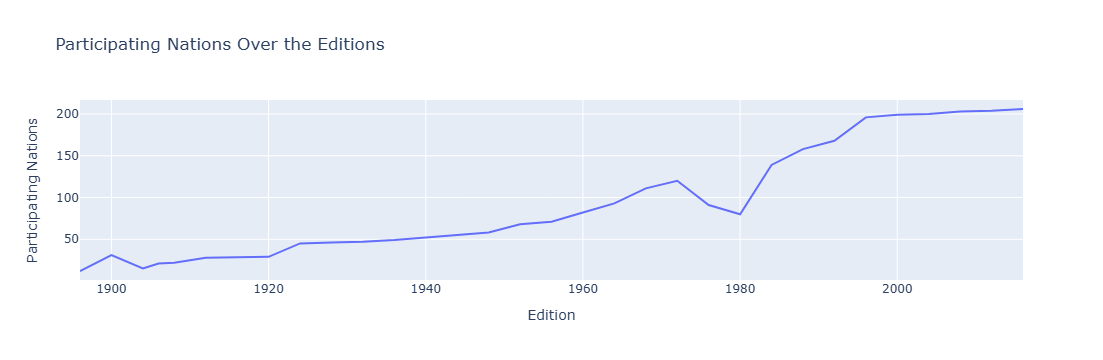

In [99]:
#For plotting graph between Edition vs Participating Nations
import plotly.express as px

figure = px.line(nations,x="Edition",y="Participating Nations",title="Participating Nations Over the Editions")
figure.show()

In [100]:
#Participating nations for each Olympic Games
events = athletes.groupby('Year')['Event'].nunique().reset_index(name='Events')  
events = events.rename(columns={'Year':'Edition'})
events

,Edition,Events
0,1896,43
1,1900,90
2,1904,95
3,1906,74
4,1908,109
5,1912,107
6,1920,158
7,1924,131
8,1928,122
9,1932,131


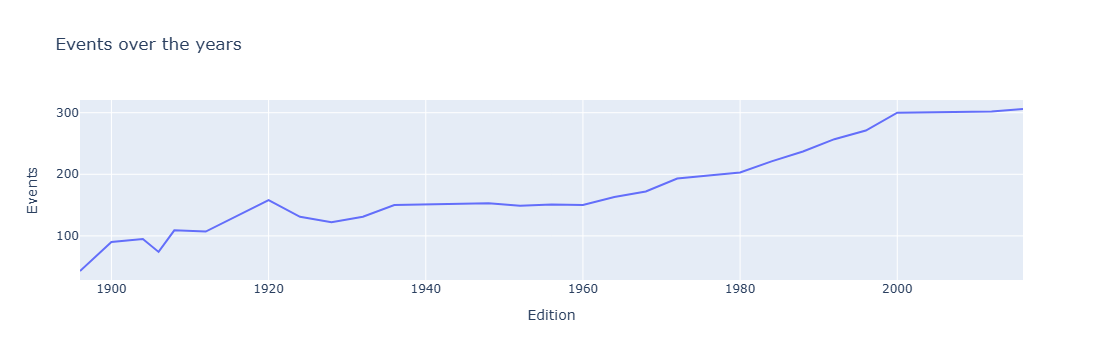

In [101]:
#For plotting graph between Edition vs Events
figure = px.line(events,x="Edition",y="Events",title="Events over the years")
figure.show()

In [102]:
#Athletes over time
names = athletes.groupby('Year')['Name'].nunique().reset_index(name='No. of Athletes')  
names = names.rename(columns={'Year':'Edition'})
names

,Edition,No. of Athletes
0,1896,176
1,1900,1220
2,1904,650
3,1906,841
4,1908,2024
5,1912,2409
6,1920,2675
7,1924,3256
8,1928,3246
9,1932,1922


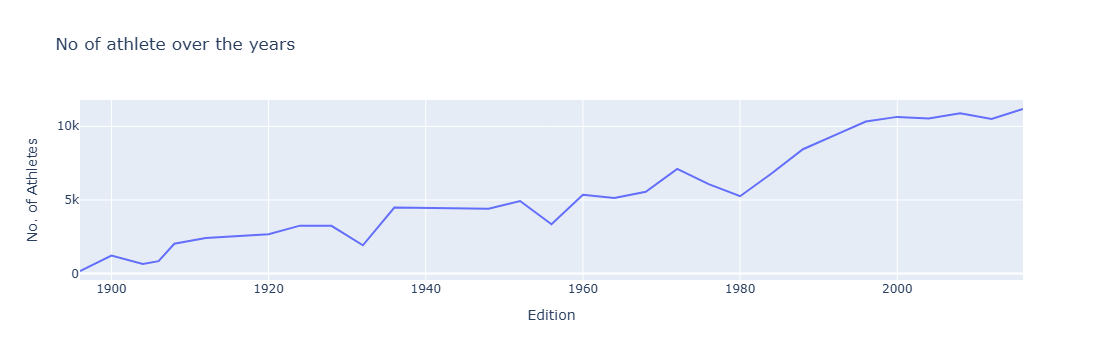

In [103]:

#For plotting graph 
figure = px.line(names,x="Edition",y="No. of Athletes",title="No of athlete over the years")
figure.show()

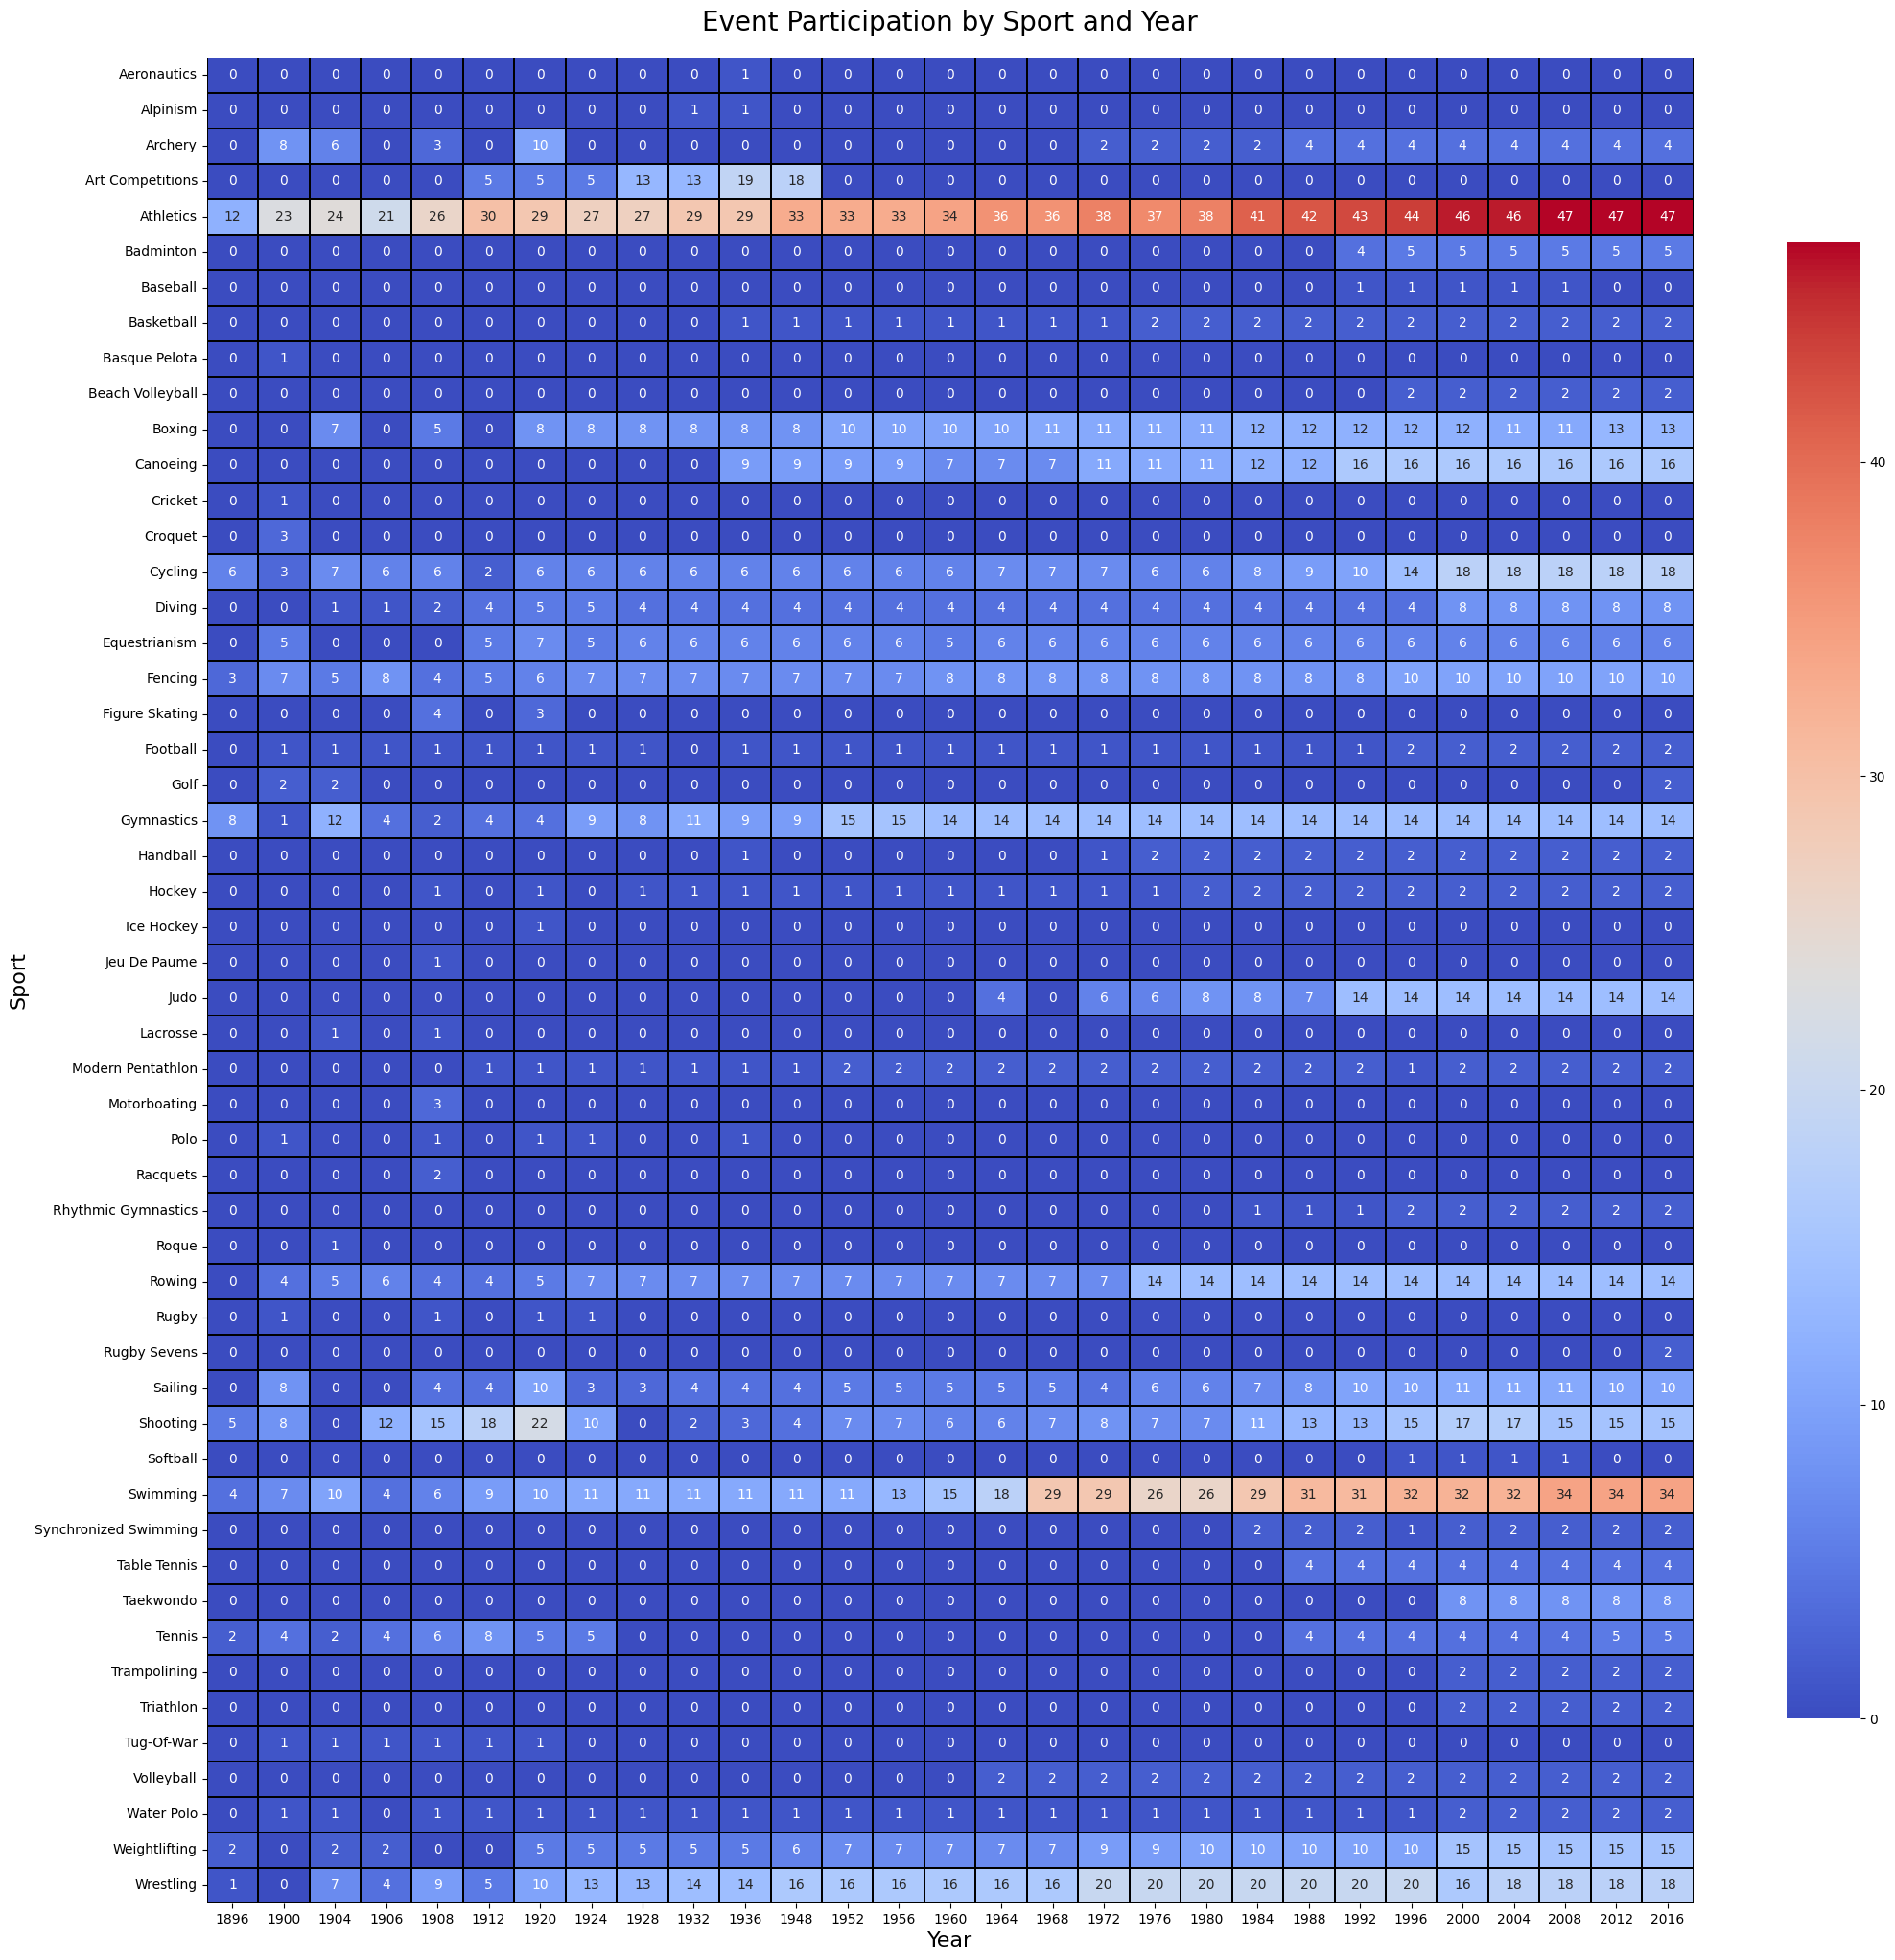

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

y = athletes.drop_duplicates(['Year', 'Sport', 'Event'])
pivot_data = y.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)

# Create heatmap
plt.figure(figsize=(25, 25))

sns.heatmap(pivot_data,annot=True,fmt='d',cmap='coolwarm',linewidths=0.3,linecolor='black',cbar_kws={'shrink': 0.8}), 
plt.title("Event Participation by Sport and Year", fontsize=20, pad=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Sport", fontsize=16)
plt.show()


In [105]:
#Most successful athletes in history of Olympics
def most_successful_athlete(athletes,sports):
    new_df = athletes.dropna(subset = ['Medal'])
    if sports != 'Overall':
        new_df = new_df[new_df['Sport'] == sports]
    y = new_df['Name'].value_counts().reset_index().merge(athletes)[['Name','count','Sport','region']].drop_duplicates('Name').head(10)
    y = y.rename(columns={'count':'Medals','region':'Country'})
    return y
    

In [106]:
most_successful_athlete(athletes,'Swimming')

,Name,Medals,Sport,Country
0,"Michael Fred Phelps, II",28,Swimming,USA
30,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
43,Natalie Anne Coughlin (-Hall),12,Swimming,USA
55,Ryan Steven Lochte,12,Swimming,USA
69,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
86,Mark Andrew Spitz,11,Swimming,USA
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
110,"Gary Wayne Hall, Jr.",10,Swimming,USA
120,Franziska van Almsick,10,Swimming,Germany
143,Ian James Thorpe,9,Swimming,Australia


In [107]:
#Drop-down menu for selecting Sports
games_list = athletes['Sport'].unique().tolist()
games_list.sort()
games_list.insert(0,'Overall')
games_list

['Overall',
 'Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(athletes,country):
    z = athletes.dropna(subset=['Medal'])
    z.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)
    new_z = z[z['region'] == country]
    all_sports = athletes['Sport'].unique()
    all_sports.sort()
    all_years = athletes['Year'].unique()
    all_years.sort()
    pivot_data = new_z.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype(int)
    pivot_data = pivot_data.reindex(index=all_sports, columns=all_years, fill_value=0)

    plt.figure(figsize=(18, 22))
    sns.heatmap(pivot_data, annot=True, cmap='viridis', linewidths=0.5, linecolor='gray', cbar=True, square=True)

    plt.title('Medal Count per Sport over the Years', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Sport', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


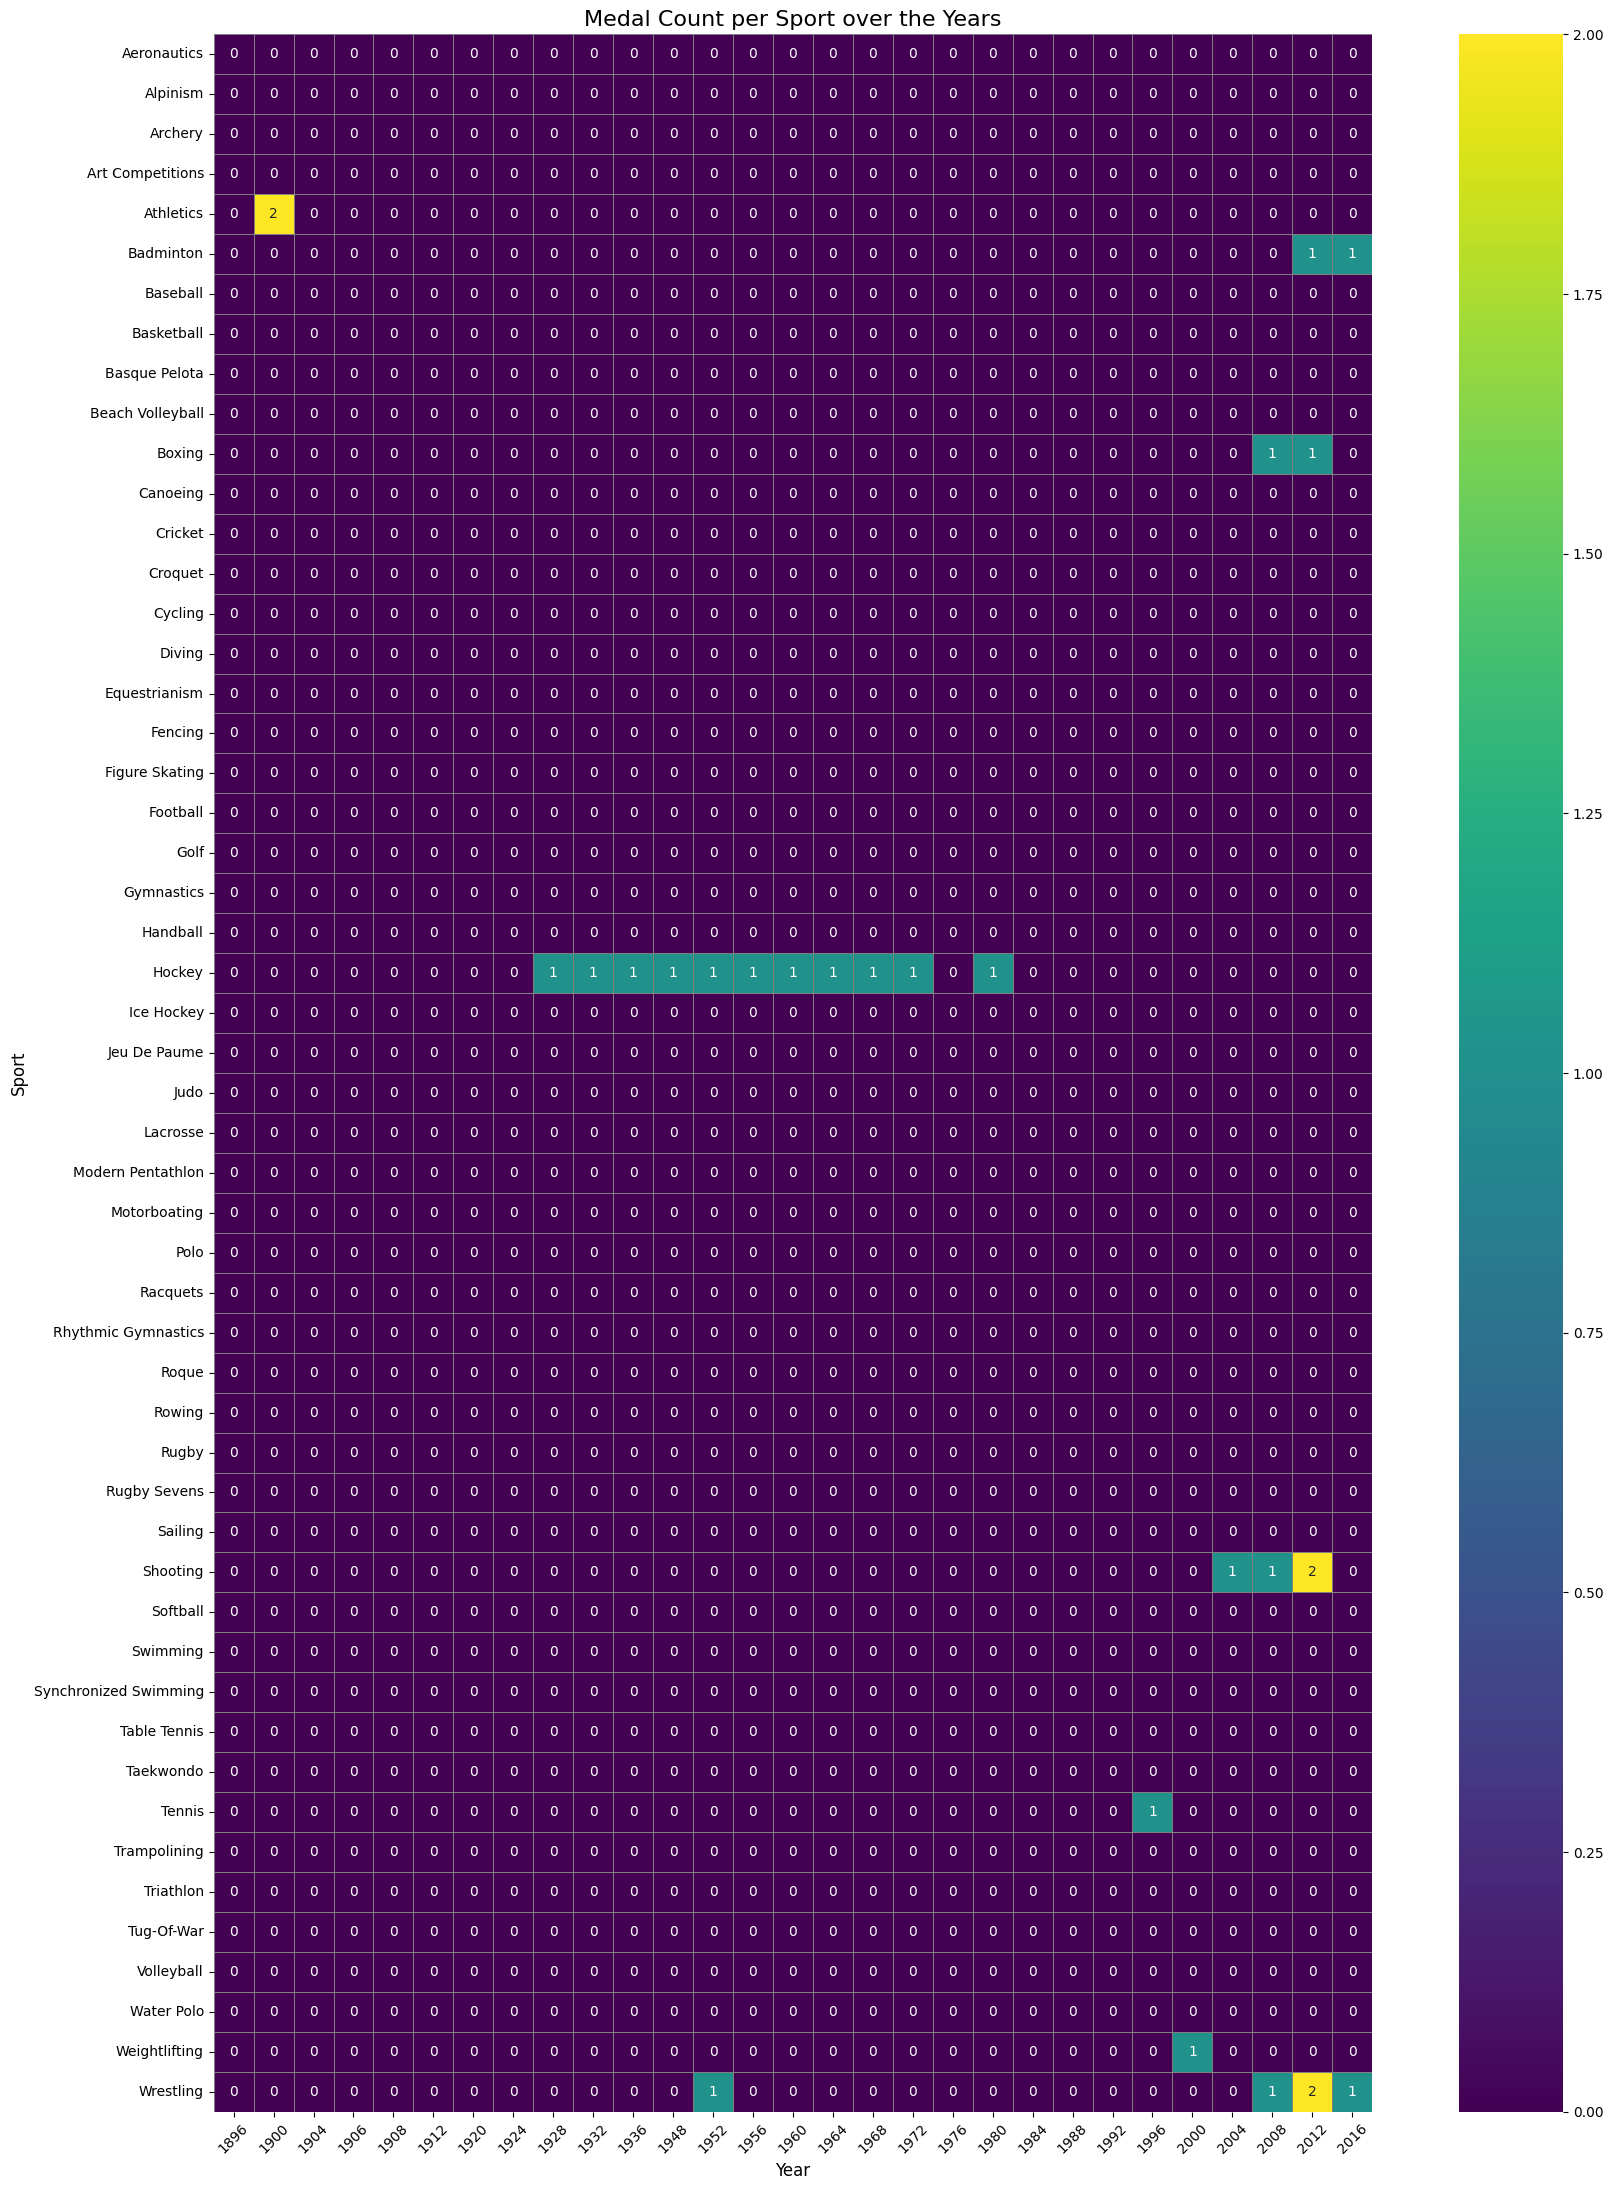

In [234]:
heatmap(athletes,'India')

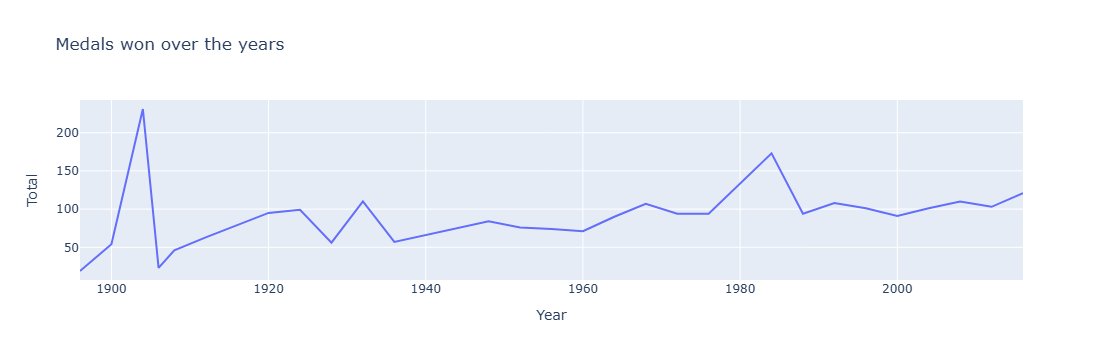

In [110]:
import plotly.express as plt
def graph(athletes_dummy,country):
  medal_tally = athletes_dummy.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
  new_tally = medal_tally[medal_tally['region'] == country]
  new_tally = new_tally.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
  new_tally['Total']= new_tally['Gold']+new_tally['Silver']+new_tally['Bronze']
  figure = px.line(new_tally,x="Year",y="Total",title="Medals won over the years")
  figure.show()
graph(athletes_dummy,'USA')    

In [111]:
#Most successful athletes for a specific country
def success_country(athletes,country):
    new_df = athletes.dropna(subset = ['Medal'])
    new_df = new_df[new_df['region'] == country]
    y = new_df['Name'].value_counts().reset_index().merge(athletes)[['Name','count','Sport','region']].drop_duplicates('Name').head(10)
    y = y.rename(columns={'count':'Medals','region':'Country'})
    return y

In [218]:
success_country(athletes,'Niger')

,Name,Medals,Sport,Country
0,Abdoul Razak Issoufou Alfaga,1,Taekwondo,Niger
1,Issaka Dabor,1,Boxing,Niger


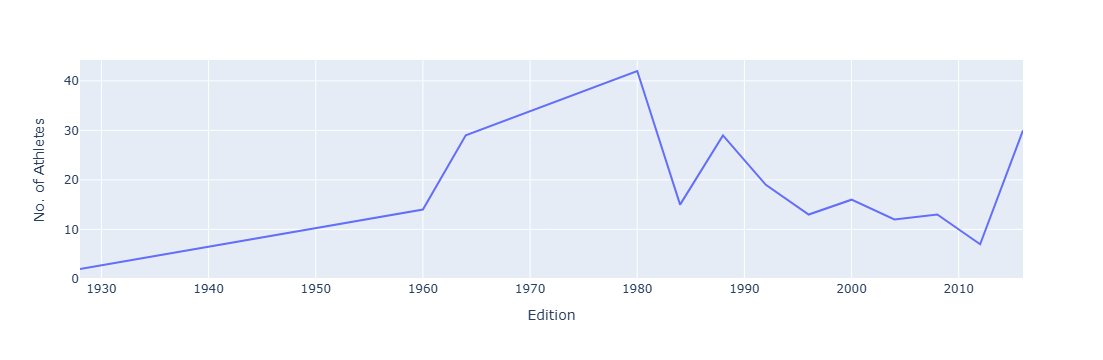

In [250]:
#Participants for country for every edition with graph
def contingent_list(athletes,country):
  participants = athletes[athletes['region'] == country]
  participants = participants.drop_duplicates(subset=['Name','Year'])
  names = participants.groupby('Year')['Name'].nunique().reset_index(name='No. of Athletes')  
  names = names.rename(columns={'Year':'Edition'})
  names
  fig = px.line(names,x="Edition",y="No. of Athletes")
  fig.show()
contingent_list(athletes,'Zimbabwe')    

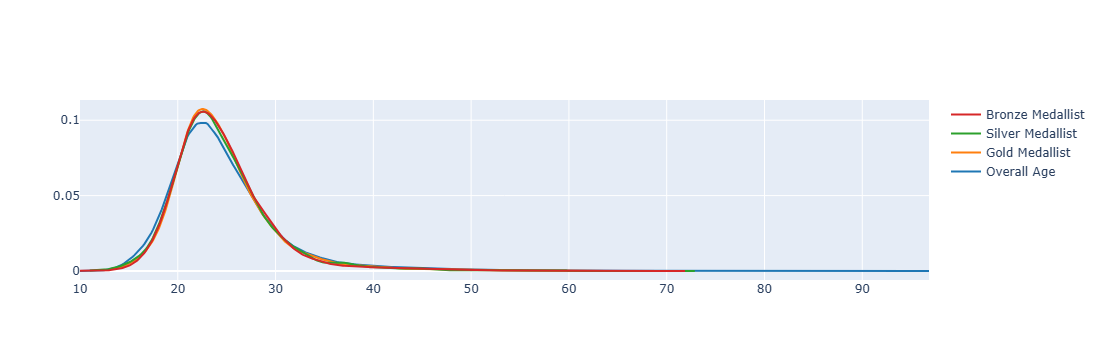

In [207]:
import plotly.figure_factory as ff
import scipy
athlete_df = athletes.drop_duplicates(subset=['Name', 'region'])
z1 = athlete_df['Age'].dropna().tolist()
z2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna().tolist()
z3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna().tolist()
z4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna().tolist()
fig = ff.create_distplot([z1, z2, z3, z4], ['Overall Age', 'Gold Medallist', 'Silver Medallist', 'Bronze Medallist'],show_hist=False, show_rug=False)
fig.show()

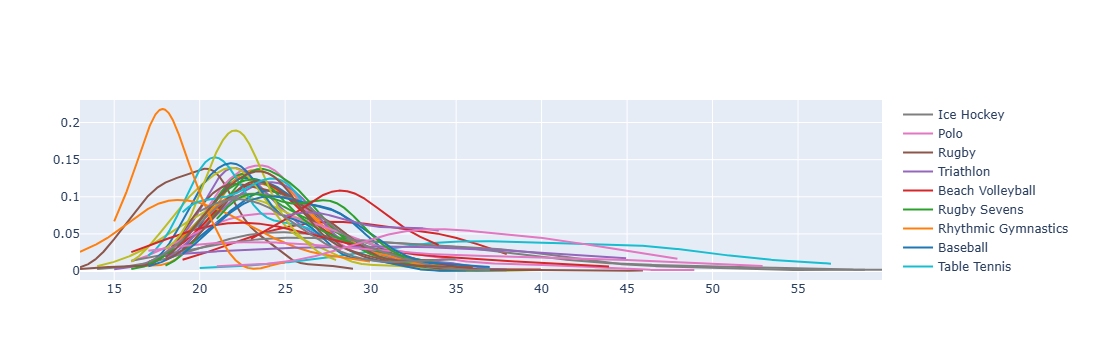

In [258]:
#Heatmap
age_data = []
sport_names = []
unique_athletes = athletes.drop_duplicates(subset=['Name', 'region'])
selected_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                   'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                   'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                   'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                   'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                   'Tennis', 'Golf', 'Softball', 'Archery',
                   'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                   'Rhythmic Gymnastics', 'Rugby Sevens',
                   'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in selected_sports:
    filtered_sport_df = unique_athletes[unique_athletes['Sport'] == sport]
    age_data.append(filtered_sport_df[filtered_sport_df['Medal'] == 'Gold']['Age'].dropna())
    sport_names.append(sport)

fig = ff.create_distplot(age_data, sport_names, show_hist=False, show_rug=False)
fig.show()


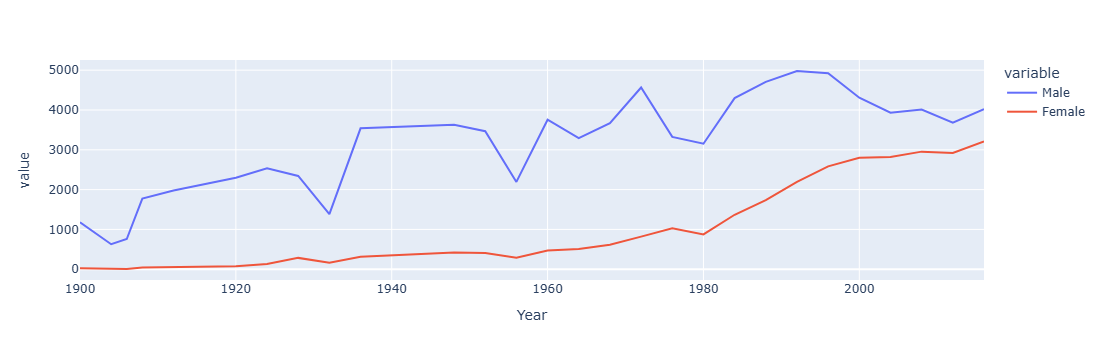

<Figure size 2000x3000 with 0 Axes>

In [213]:
#Men vs Women participation in Olympics
import plotly.express as px
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year')['Name'].size().reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year')['Name'].size().reset_index()
last = men.merge(women,on='Year')
last.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
plt.figure(figsize=(20,30))
fig = px.line(last,x="Year",y=["Male","Female"])
fig.show()

In [219]:
last

,Year,Male,Female
0,1900,1181,23
1,1904,629,6
2,1906,759,6
3,1908,1773,44
4,1912,1979,53
5,1920,2296,73
6,1924,2538,132
7,1928,2344,285
8,1932,1383,162
9,1936,3540,316


<Axes: xlabel='Weight', ylabel='Height'>

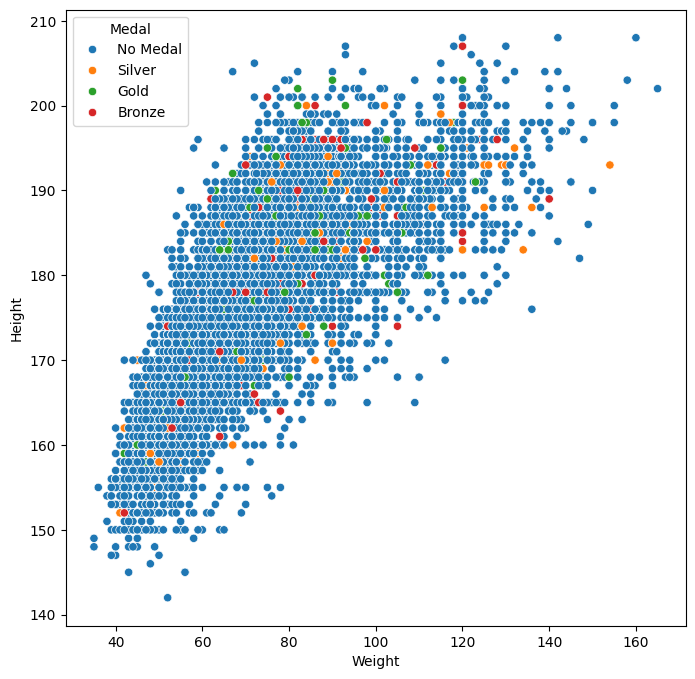

In [254]:
#Scatterplot
sports_df = athlete_df['Medal'].fillna('No Medal',inplace=True)
plt.figure(figsize=(8,8))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x="Weight",y="Height",data=temp_df,hue=temp_df['Medal'])